In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

from statsmodels.stats.weightstats import DescrStatsW

import us

import sys

import os
path = os.getcwd()
path = path[:path.find('brazil_election2022')] + 'brazil_election2022'

sys.path.append(path + '\\src\\data')
import make_dataset

---

---

---

---

---

---

---

---

---

In [2]:
make_dataset.presidentApproval_preprocessig()

In [3]:
!python ..\\src\\data\\Twitter\\0-brazil.cursor_timeline.py



#########################
Jair Bolsonaro
start: 2020-07-21
end: 2020-07-28
----------
connected to mysql
connected to api
----------

 connected to cursor timeline
----------

2020-07-27 20:51:13+00:00
2020-07-27 11:10:36+00:00
2020-07-26 20:18:19+00:00
2020-07-26 15:40:39+00:00
2020-07-26 15:39:47+00:00
2020-07-26 15:10:44+00:00
2020-07-26 12:51:31+00:00
2020-07-25 22:54:22+00:00
2020-07-25 22:54:14+00:00
2020-07-25 21:10:41+00:00
2020-07-25 18:09:51+00:00
2020-07-25 18:08:07+00:00
2020-07-25 18:06:42+00:00
2020-07-25 18:06:20+00:00
2020-07-25 15:14:05+00:00
2020-07-25 11:59:48+00:00
2020-07-24 11:16:22+00:00
2020-07-24 11:14:36+00:00
2020-07-24 11:12:29+00:00
2020-07-24 02:52:59+00:00
2020-07-24 02:51:50+00:00
2020-07-23 21:33:28+00:00
2020-07-23 13:45:57+00:00
2020-07-23 10:10:14+00:00
2020-07-23 10:06:38+00:00
2020-07-23 10:03:31+00:00
2020-07-22 10:05:21+00:00
2020-07-21 19:13:45+00:00
2020-07-21 13:12:50+00:00
2020-07-21 10:54:29+00:00
2020-07-21 10:51:41+00:00
2020-07-21 10:48

---

---

---

In [4]:
approval = pd.read_csv(path+'\\data\\processed\\presidentApproval_processed.csv', parse_dates=['datafim'])
approval.head()

,datafim,positiva,regular,negativa,ns.nr,erro,ic,n,ufs,cidades,empresa,partido,presidente,tipo,pergunta,modo,empresa_avaliaca,peso
0,1986-03-15,71.0,25.0,2.0,3.0,3.0,95.0,2314.0,0,NaN,Datafolha,PMDB,José Sarney,Avaliação do governo federal,Na sua opinião o presidente José Sarney está s...,Face-to-Face,2.0,4628.0
1,1987-03-15,33.0,45.0,19.0,3.0,3.0,95.0,2314.0,0,NaN,Datafolha,PMDB,José Sarney,Avaliação do governo federal,Na sua opinião o presidente José Sarney está s...,Face-to-Face,2.0,4628.0
2,1987-05-15,9.0,35.0,54.0,2.0,3.0,95.0,2314.0,0,NaN,Datafolha,PMDB,José Sarney,Avaliação do governo federal,Na sua opinião o presidente José Sarney está f...,Face-to-Face,2.0,4628.0
3,1987-11-15,11.0,29.0,58.0,2.0,3.0,95.0,2314.0,0,NaN,Datafolha,PMDB,José Sarney,Avaliação do governo federal,Na sua opinião o presidente José Sarney está f...,Face-to-Face,2.0,4628.0
4,1988-03-15,10.0,23.0,65.0,2.0,3.0,95.0,2314.0,0,NaN,Datafolha,PMDB,José Sarney,Avaliação do governo federal,Na sua opinião o presidente José Sarney está f...,Face-to-Face,2.0,4628.0


In [5]:
bolsonaro_approval = approval[approval['presidente'] == 'Jair Bolsonaro']
bolsonaro_approval = bolsonaro_approval[bolsonaro_approval['ufs'].apply(lambda x: x.isnumeric())]
bolsonaro_approval = bolsonaro_approval.set_index('datafim').sort_index()
bolsonaro_approval.head()

,positiva,regular,negativa,ns.nr,erro,ic,n,ufs,cidades,empresa,partido,presidente,tipo,pergunta,modo,empresa_avaliaca,peso
datafim,,,,,,,,,,,,,,,,,
2019-01-10,50.0,28.0,22.0,0.0,3.0,95.0,1723.0,0,121,IDEIA Big Data,PSL,Jair Bolsonaro,Avaliação do governo federal,O (a) Sr. (a) avalia o governo do presidente J...,Online,1.0,1723.0
2019-01-15,40.0,29.0,20.0,11.0,3.2,95.0,1000.0,0,NaN,Ipespe/XP,PSL,Jair Bolsonaro,Avaliação do governo federal,desempenho do presidente,NaN,1.0,1000.0
2019-01-21,51.0,28.0,21.0,0.0,3.0,95.0,1723.0,0,121,IDEIA Big Data,PSL,Jair Bolsonaro,Avaliação do governo federal,O (a) Sr. (a) avalia o governo do presidente J...,Online,1.0,1723.0
2019-01-30,50.0,28.0,22.0,0.0,2.0,95.0,2300.0,0,121,IDEIA Big Data,PSL,Jair Bolsonaro,Avaliação do governo federal,Você aprova ou desaprova a maneira como Jair B...,Online,1.0,2300.0
2019-01-30,49.0,26.0,11.0,14.0,2.0,95.0,2000.0,0,126,Ibope,PSL,Jair Bolsonaro,Avaliação do governo federal,O (a) Sr. (a) avalia o governo do presidente J...,NaN,2.0,4000.0


---

---

---

In [6]:
def get_stats(data, k):
    """
    return main statistics of approval series (weighted avg and weighted std)
    input:
        - data (dataframe): df with ['positiva', 'regular', 'negativa', 'ns.nr'] series
        - k (int): last k polls to consider
    output:
        - dataframe with avg and std    
    """
    mean = []
    std = []
    index_dates = pd.date_range(start='2019-02-01', end=datetime.today())
    
    for day in index_dates:
        df = data.loc[:day.date()].tail(k)

        descriptive_stats = DescrStatsW(df[['positiva', 'regular', 'negativa', 'ns.nr']].astype(float), weights=df['peso'])

        mean.append(descriptive_stats.mean)
        std.append(descriptive_stats.std)

    mean = pd.DataFrame(mean, index=index_dates, columns=['positiva_avg', 'regular_avg', 'negativa_avg', 'ns.nr_avg'])
    std = pd.DataFrame(std, index=index_dates, columns=['positiva_std', 'regular_std', 'negativa_std', 'ns.nr_std'])
    
    return mean.join(std)

In [7]:
stats_k05 = get_stats(bolsonaro_approval, k=5)
stats_k10 = get_stats(bolsonaro_approval, k=10)

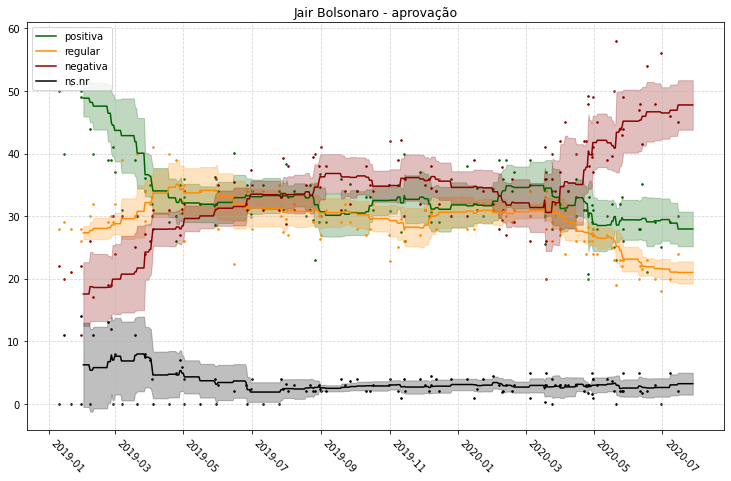

In [8]:
cols = ['positiva', 'regular', 'negativa', 'ns.nr']
colors_dict = {'positiva':'darkgreen', 'regular':'darkorange', 'negativa':'darkred', 'ns.nr':'black'}

plt.figure(figsize=(12.5, 7.5))
for col in cols:
    col_avg = col+'_avg'
    col_std = col+'_std'
    plt.plot(stats_k10[col_avg], color=colors_dict[col], label=col)
    plt.fill_between(x=stats_k10.index, color= colors_dict[col], alpha=0.25,
                     y2=stats_k10[col_avg]-stats_k10[col_std], 
                     y1=stats_k10[col_avg]+stats_k10[col_std])
    
    plt.scatter(x=bolsonaro_approval.index, y=bolsonaro_approval[col], 
                color=colors_dict[col], s=2.5)

    
plt.title('Jair Bolsonaro - aprovação', fontsize=12.5)    
plt.xticks(rotation=-45, ha='left')
plt.legend(loc=2)
plt.grid(ls='--', alpha=0.5)
plt.savefig(path+'\\reports\\figures\\JairBolsonaro_approval.png', bbox_inches='tight')
plt.show()

In [9]:
cols = ['empresa', 'n', 'positiva', 'regular', 'negativa', 'ns.nr']
cols_rename = {'positiva':'positive', 'negativa':'negative', 'ns.nr':'don\'t know'}
bolsonaro_approval[cols].tail(5).reset_index().set_index(['datafim', 'empresa', 'n'])[::-1].rename(cols_rename, axis='columns')

,,,positive,regular,negative,don't know
datafim,empresa,n,,,,
2020-07-15,Ipespe/XP,1000.0,30.0,24.0,45.0,2.0
2020-07-08,Poder360,2500.0,29.0,20.0,46.0,5.0
2020-06-30,Atlas Político,2000.0,25.0,18.0,56.0,0.0
2020-06-24,Poder360,2500.0,29.0,20.0,48.0,3.0
2020-06-17,Quaest,1000.0,21.0,23.0,54.0,2.0


---

---

---

# Engagement Index - social media

In [10]:
def get_social_media_index():
    """
    expertise
    """
    pass

engag_index = pd.read_csv(path+'\\data\\external\\EngagementIndex.csv', sep=';', parse_dates=True, index_col=0)

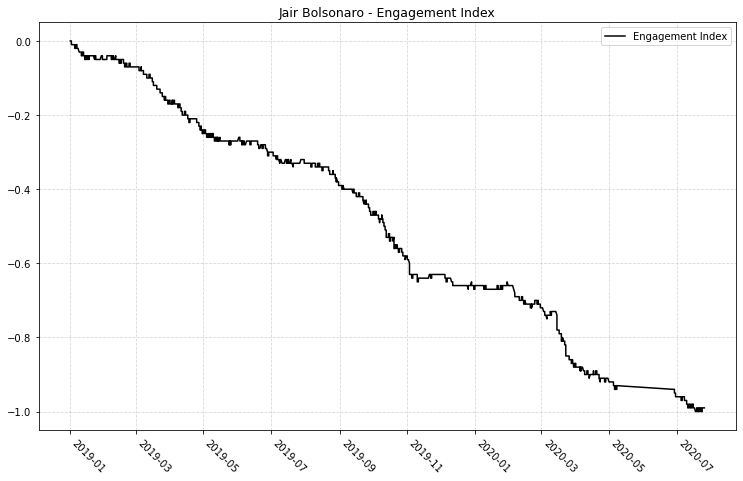

In [11]:
plt.figure(figsize=(12.5, 7.5))

plt.plot(engag_index, color='black', label='Engagement Index')

plt.title('Jair Bolsonaro - Engagement Index', fontsize=12.5)    
plt.xticks(rotation=-45, ha='left')
plt.legend(loc=1)
plt.grid(ls='--', alpha=0.5)
plt.savefig(path+'\\reports\\figures\\JairBolsonaro_EngagementIndex.png', bbox_inches='tight')
plt.show()

---

---

---

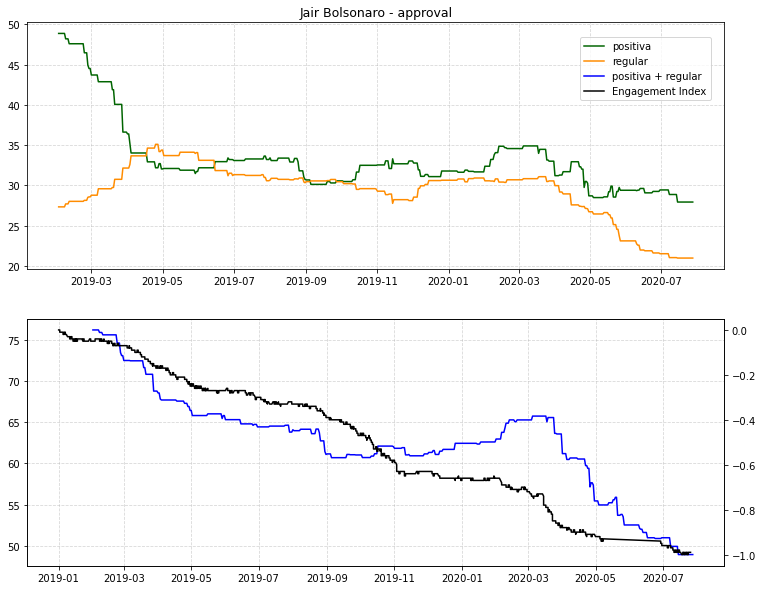

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12.5, 10), )
ax3 = ax2.twinx()

ax1.plot(stats_k10['positiva_avg'], color='darkgreen', label='positiva')
ax1.plot(stats_k10['regular_avg'], color='darkorange', label='regular')
ax2.plot(np.sum(stats_k10[['positiva_avg', 'regular_avg']], axis='columns'), color='blue', label='positiva + regular')
ax3.plot(engag_index, color='black', label='Engagement Index')


ax1.set_title('Jair Bolsonaro - approval', fontsize=12.5)    
plt.xticks(rotation=-45, ha='left')
fig.legend(loc='upper right', bbox_to_anchor=(0.795, 0.775))
ax1.grid(ls='--', alpha=0.5)
ax2.grid(ls='--', alpha=0.5)
plt.savefig(path+'\\reports\\figures\\JairBolsonaro_EngagementIndex+Approval.png', bbox_inches='tight')
plt.show()

---

---

---

---

---

---